Script para sacar todo lo necesario para el proyecto 3

Importacion de librerias: 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
from scipy.stats import linregress
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import *
import sklearn.metrics as metrics
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV,Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from joblib import dump, load
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


from scipy.stats import chi2_contingency
from math import sqrt

Leer datos de un csv

In [2]:
archivos = "todoscsvs.csv"
datos = pd.read_csv(archivos, encoding = 'utf-8')

# - Analisis Exploratorio #

Resumen de los datos

In [3]:
datos.describe()

,id_registro,año_ocu,mes_ocu,dia_ocu,dia_sem_ocu,hora_ocu,g_hora,g_hora_periodo,area_geo_ocu,depto_ocu,...,edad,g_edad_60ymás,g_edad_80ymás,edad_quinquenales,delito,g_delitos,filter_$,menor_mayor,codigo_interno,causas
count,581337.000000,581337.000000,581337.000000,558860.000000,556650.000000,534224.000000,534224.000000,534224.000000,358984.000000,581337.000000,...,581188.000000,534224.000000,534224.000000,534224.000000,556650.000000,534224.000000,62203.000000,270439.000000,72761.000000,24687.000000
mean,32187.280254,2018.722313,6.414735,15.254167,4.373790,13.871719,2.890602,2.052693,1.563485,8.915581,...,41.038394,4.928391,4.985716,6.981920,51.060273,6.741824,0.003231,1.056870,138.832671,38.841739
std,21365.207428,3.044776,3.371701,8.913436,2.058506,7.554647,1.093690,0.847983,0.496583,6.796250,...,97.915120,2.238831,2.448297,2.455828,15.749197,1.011271,0.056754,0.420528,299.507294,18.289013
min,1.000000,2011.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,14063.000000,2017.000000,4.000000,7.000000,3.000000,9.000000,2.000000,1.000000,1.000000,1.000000,...,23.000000,3.000000,3.000000,5.000000,47.000000,7.000000,0.000000,1.000000,45.000000,25.000000
50%,30065.000000,2019.000000,6.000000,15.000000,5.000000,16.000000,3.000000,2.000000,2.000000,9.000000,...,29.000000,4.000000,4.000000,6.000000,50.000000,7.000000,0.000000,1.000000,50.000000,39.000000
75%,47534.000000,2021.000000,9.000000,23.000000,6.000000,19.000000,4.000000,3.000000,2.000000,15.000000,...,38.000000,6.000000,6.000000,8.000000,68.000000,7.000000,0.000000,1.000000,53.000000,52.000000
max,93914.000000,2024.000000,12.000000,31.000000,7.000000,99.000000,5.000000,4.000000,9.000000,22.000000,...,999.000000,12.000000,16.000000,18.000000,68.000000,7.000000,1.000000,9.000000,1279.000000,68.000000


In [4]:
datos.head()

,id_registro,año_ocu,mes_ocu,dia_ocu,dia_sem_ocu,hora_ocu,g_hora,g_hora_periodo,area_geo_ocu,depto_ocu,...,edad,g_edad_60ymás,g_edad_80ymás,edad_quinquenales,delito,g_delitos,filter_$,menor_mayor,codigo_interno,causas
0,1.0,2024.0,1.0,1.0,1.0,10.0,2.0,1.0,1.0,1.0,...,23.0,3.0,3.0,5.0,68.0,7.0,NaN,NaN,NaN,NaN
1,2.0,2024.0,1.0,1.0,1.0,10.0,2.0,1.0,1.0,1.0,...,23.0,3.0,3.0,5.0,68.0,7.0,NaN,NaN,NaN,NaN
2,3.0,2024.0,1.0,1.0,1.0,6.0,2.0,1.0,1.0,1.0,...,39.0,6.0,6.0,8.0,25.0,7.0,NaN,NaN,NaN,NaN
3,4.0,2024.0,1.0,1.0,1.0,20.0,4.0,3.0,1.0,1.0,...,25.0,4.0,4.0,6.0,50.0,7.0,NaN,NaN,NaN,NaN
4,5.0,2024.0,1.0,1.0,1.0,6.0,2.0,1.0,1.0,1.0,...,48.0,8.0,8.0,10.0,39.0,7.0,NaN,NaN,NaN,NaN


In [5]:
datos.columns

Index(['id_registro', 'año_ocu', 'mes_ocu', 'dia_ocu', 'dia_sem_ocu',
       'hora_ocu', 'g_hora', 'g_hora_periodo', 'area_geo_ocu', 'depto_ocu',
       'mupio_ocu', 'zona_ocu', 'sexo', 'edad', 'g_edad_60ymás',
       'g_edad_80ymás', 'edad_quinquenales', 'delito', 'g_delitos', 'filter_$',
       'menor_mayor', 'codigo_interno', 'causas'],
      dtype='object')

Descripcion de las columnas dentro del dataset:

1. **id_registro**: Identificador único del registro de la ocupación. <br>
2. **año_ocu**: Año en el que ocurrió el evento de ocupación. <br>
3. **mes_ocu**: Mes en el que ocurrió el evento de ocupación. <br>
4. **dia_ocu**: Día en el que ocurrió el evento de ocupación. <br>
5. **dia_sem_ocu**: Día de la semana en el que ocurrió la ocupación (lunes, martes, etc.). <br>
6. **hora_ocu**: Hora exacta en la que ocurrió la ocupación. <br>
7. **g_hora**: Grado o categoría de la hora en la que ocurrió la ocupación (puede indicar intervalos o periodos de tiempo). <br>
8. **g_hora_periodo**: Período al que pertenece la hora de la ocupación (por ejemplo, mañana, tarde, noche). <br>
9. **area_geo_ocu**: Área geográfica donde ocurrió la ocupación (por ejemplo, municipio, distrito, etc.). <br>
10. **depto_ocu**: Departamento donde se registró la ocupación. <br>
11. **mupio_ocu**: Municipio donde se reportó la ocupación. <br>
12. **zona_ocu**: Zona o región dentro del área geográfica donde ocurrió la ocupación. <br>
13. **sexo**: Sexo de la persona involucrada en la ocupación (masculino, femenino). <br>
14. **edad**: Edad de la persona involucrada en el evento de ocupación. <br>
15. **g_edad_60ymás**: Grado o categoría de personas de 60 años o más involucradas en la ocupación. <br>
16. **g_edad_80ymás**: Grado o categoría de personas de 80 años o más involucradas en la ocupación. <br>
17. **edad_quinquenales**: Grupo de edad quinquenal al que pertenece la persona involucrada (por ejemplo, 60-64, 65-69, etc.). <br>
18. **delito**: Tipo de delito o acción ilegal asociada con la ocupación. <br>
19. **g_delitos**: Grado o categoría del tipo de delito según su gravedad o naturaleza. <br>
20. **filter_$**: Filtro económico o categoría asociada con el valor monetario de la ocupación (si aplica). <br>
21. **menor_mayor**: Indica si la persona involucrada es menor o mayor de edad. <br>
22. **codigo_interno**: Código interno del registro para identificación o clasificación interna. <br>
23. **causas**: Causas o factores que provocaron la ocupación o el evento relacionado. <br>


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581337 entries, 0 to 581336
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_registro        581337 non-null  float64
 1   año_ocu            581337 non-null  float64
 2   mes_ocu            581337 non-null  float64
 3   dia_ocu            558860 non-null  float64
 4   dia_sem_ocu        556650 non-null  float64
 5   hora_ocu           534224 non-null  float64
 6   g_hora             534224 non-null  float64
 7   g_hora_periodo     534224 non-null  float64
 8   area_geo_ocu       358984 non-null  float64
 9   depto_ocu          581337 non-null  float64
 10  mupio_ocu          556650 non-null  float64
 11  zona_ocu           534224 non-null  float64
 12  sexo               581337 non-null  float64
 13  edad               581188 non-null  float64
 14  g_edad_60ymás      534224 non-null  float64
 15  g_edad_80ymás      534224 non-null  float64
 16  ed

Como se puede observar, hay un total de 23 columnas que contienen datos numericos cada una de ellas.

In [7]:
datos.isnull().sum()

id_registro               0
año_ocu                   0
mes_ocu                   0
dia_ocu               22477
dia_sem_ocu           24687
hora_ocu              47113
g_hora                47113
g_hora_periodo        47113
area_geo_ocu         222353
depto_ocu                 0
mupio_ocu             24687
zona_ocu              47113
sexo                      0
edad                    149
g_edad_60ymás         47113
g_edad_80ymás         47113
edad_quinquenales     47113
delito                24687
g_delitos             47113
filter_$             519134
menor_mayor          310898
codigo_interno       508576
causas               556650
dtype: int64

In [8]:
datos.duplicated().sum()

np.int64(0)

Como se pudo observar anteriormente, solamente contamos con variables numericas, en este caso, tipo float

Procedemos a limpiar el dataset sustituyendo los valores vacios por la mediana.

In [9]:
# Columnas los cuales tienen datos faltantes.
datos.fillna({'dia_ocu' : datos['dia_ocu'].median()}, inplace=True)
datos.fillna({'dia_sem_ocu' : datos['dia_sem_ocu'].median()}, inplace=True)
datos.fillna({'hora_ocu' : datos['hora_ocu'].median()}, inplace=True)
datos.fillna({'g_hora' : datos['g_hora'].median()}, inplace=True)
datos.fillna({'g_hora_periodo' : datos['g_hora_periodo'].median()}, inplace=True)
datos.fillna({'area_geo_ocu' : datos['area_geo_ocu'].median()}, inplace=True)
datos.fillna({'mupio_ocu' : datos['mupio_ocu'].median()}, inplace=True)
datos.fillna({'zona_ocu' : datos['zona_ocu'].median()}, inplace=True)
datos.fillna({'edad' : datos['edad'].median()}, inplace=True)
datos.fillna({'g_edad_60ymás' : datos['g_edad_60ymás'].median()}, inplace=True)
datos.fillna({'g_edad_80ymás' : datos['g_edad_80ymás'].median()}, inplace=True)
datos.fillna({'edad_quinquenales' : datos['edad_quinquenales'].median()}, inplace=True)
datos.fillna({'delito' : datos['delito'].mode()[0]}, inplace=True)  # Usando moda para la columna 'delito'
datos.fillna({'g_delitos' : datos['g_delitos'].median()}, inplace=True)
datos.fillna({'filter_$' : datos['filter_$'].median()}, inplace=True)
datos.fillna({'menor_mayor' : datos['menor_mayor'].mode()[0]}, inplace=True)  # Usando moda para 'menor_mayor'
datos.fillna({'codigo_interno' : datos['codigo_interno'].mode()[0]}, inplace=True)  # Usando moda para 'codigo_interno'
datos.fillna({'causas' : datos['causas'].mode()[0]}, inplace=True)  # Usando moda para 'causas'


Volvemos a revisar si aun tenemos datos vacios

In [10]:
datos.isnull().sum()

id_registro          0
año_ocu              0
mes_ocu              0
dia_ocu              0
dia_sem_ocu          0
hora_ocu             0
g_hora               0
g_hora_periodo       0
area_geo_ocu         0
depto_ocu            0
mupio_ocu            0
zona_ocu             0
sexo                 0
edad                 0
g_edad_60ymás        0
g_edad_80ymás        0
edad_quinquenales    0
delito               0
g_delitos            0
filter_$             0
menor_mayor          0
codigo_interno       0
causas               0
dtype: int64

Realizamos una matriz de correlacion para ver la correlacion entre las variables.

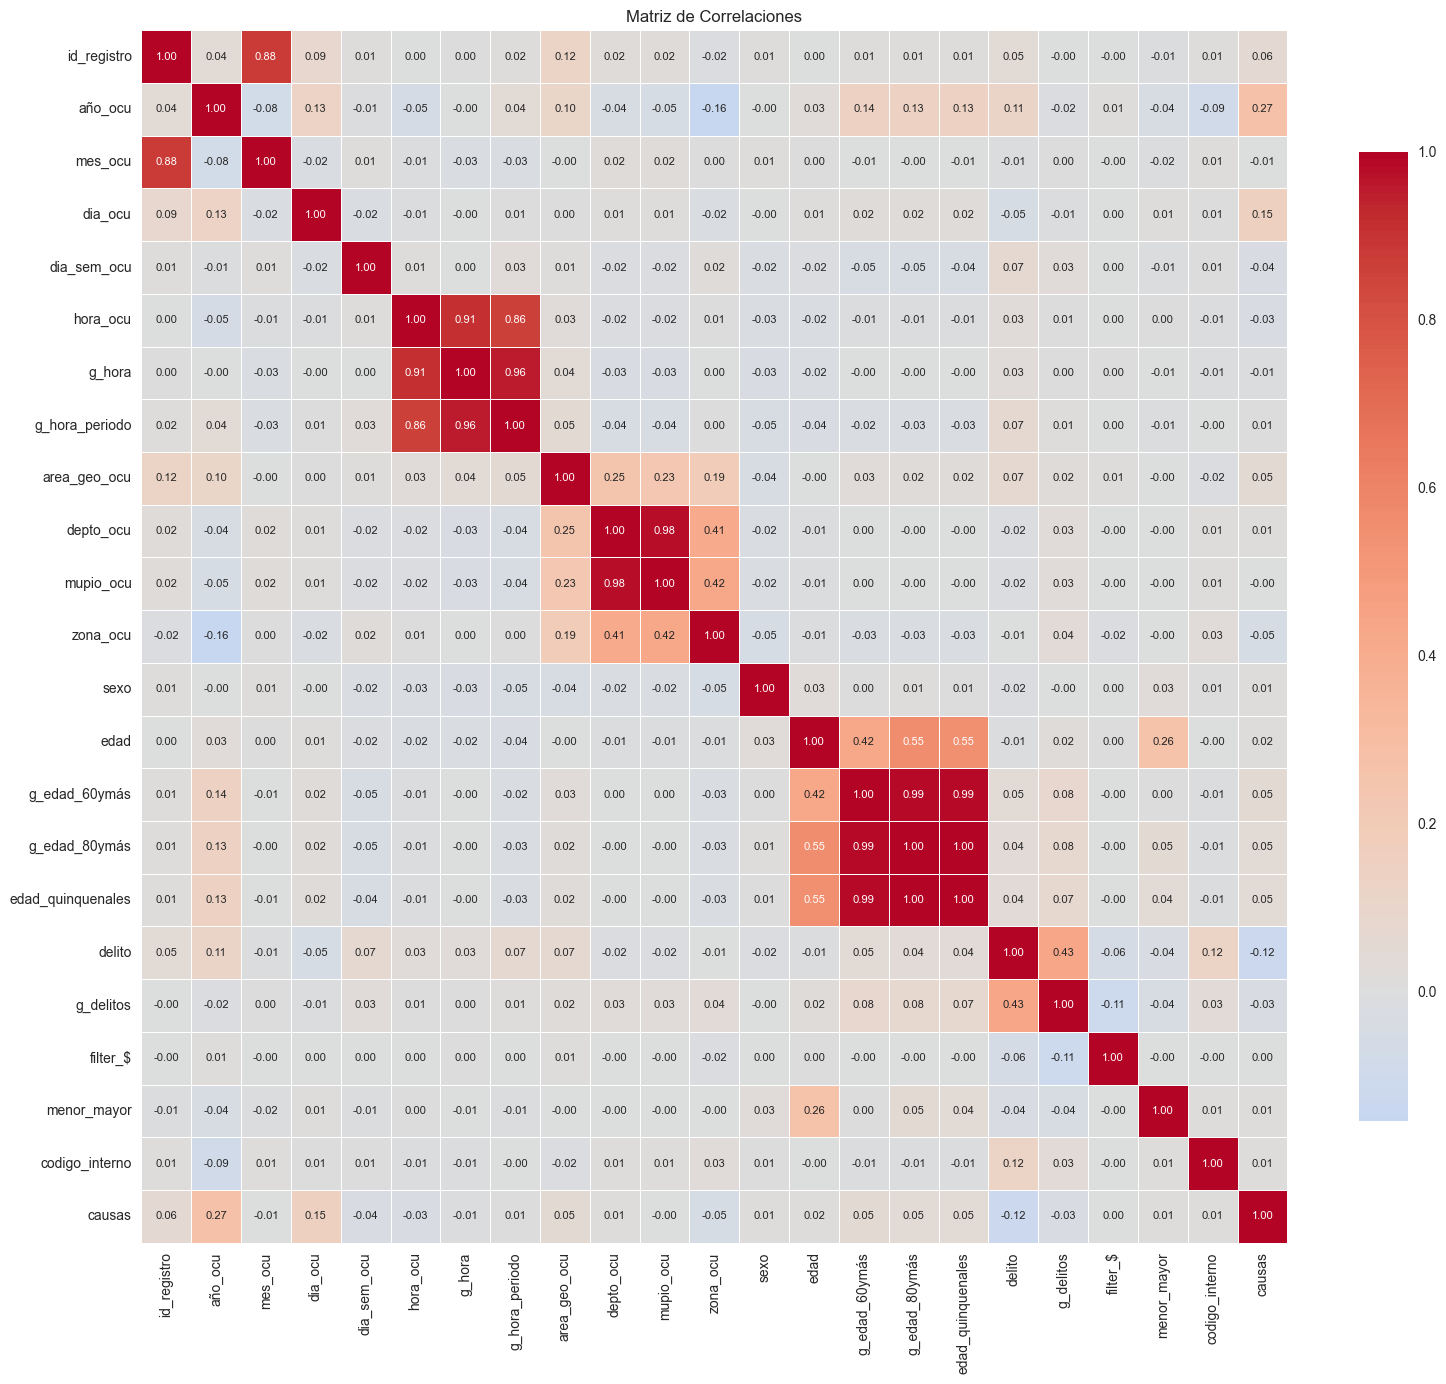

In [11]:

# Calcular matriz de correlaciones
corr_matrix = datos.corr()

plt.figure(figsize=(16, 14))

# Crear el heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            cbar_kws={'shrink': 0.8},  # Reducir el tamaño de la barra de color
            annot_kws={'size': 8},  # Reducir el tamaño de la fuente de los números
            linewidths=0.5)


plt.xticks(rotation=90)  # Rota las etiquetas del eje X
plt.yticks(rotation=0)   # Rota las etiquetas del eje Y (si es necesario)


plt.title('Matriz de Correlaciones')
plt.tight_layout()
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(datos)
X_scaled = pd.DataFrame(X_scaled, columns=datos.columns)


--- Análisis de la variable: id_registro ---


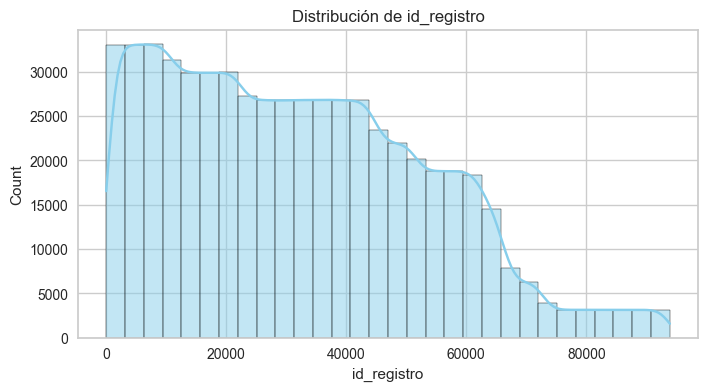

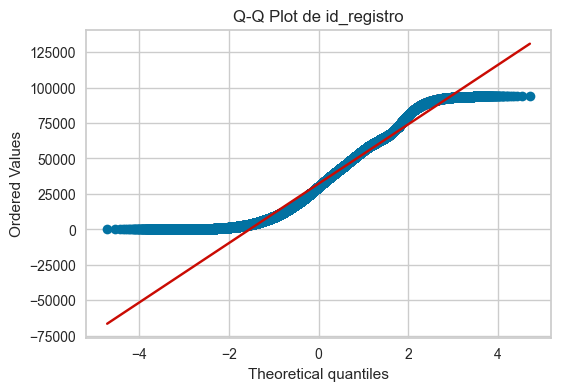

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 5269.1464
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: año_ocu ---


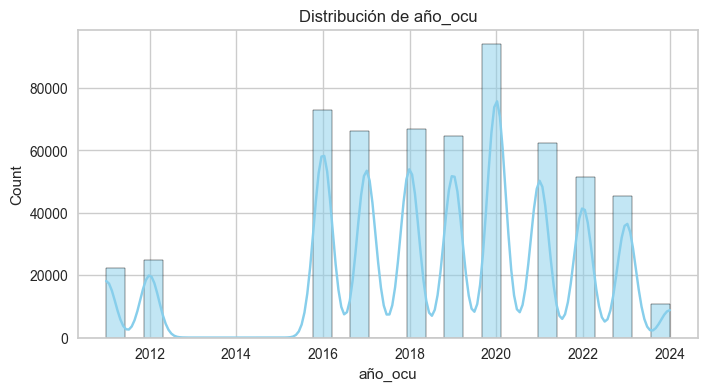

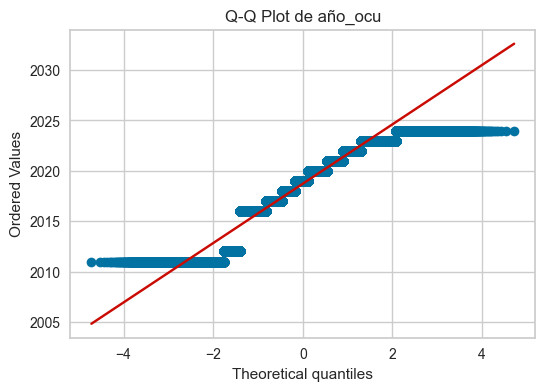

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 9703.8258
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: mes_ocu ---


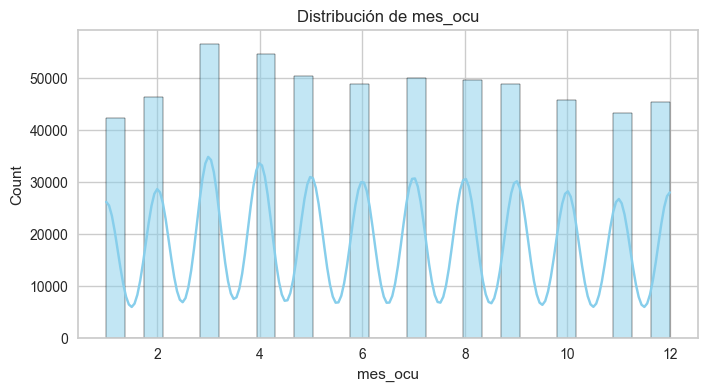

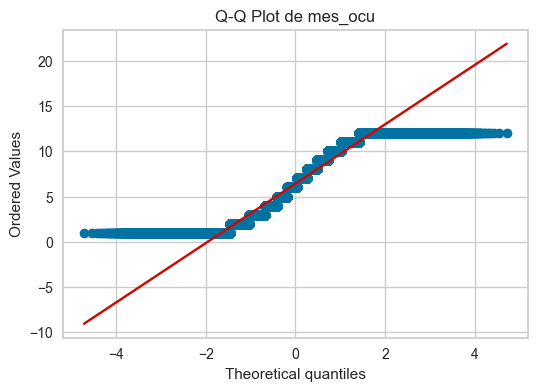

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 8302.8285
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: dia_ocu ---


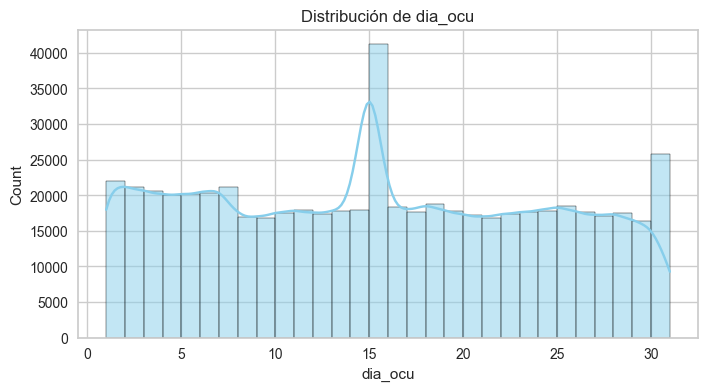

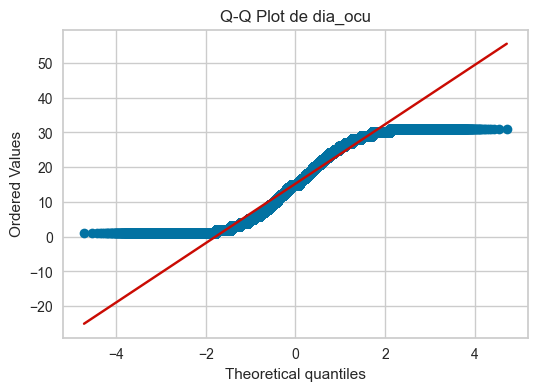

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 6072.3940
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: dia_sem_ocu ---


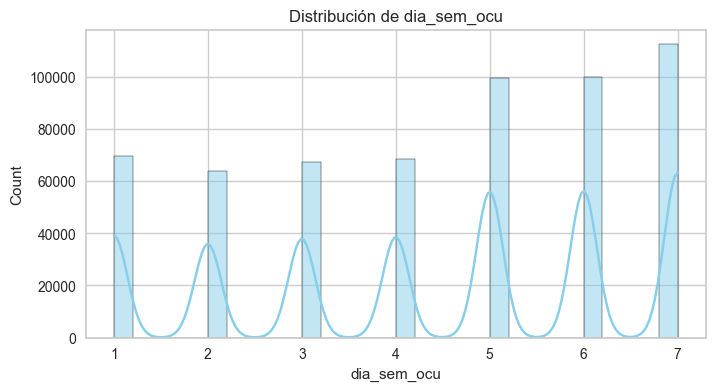

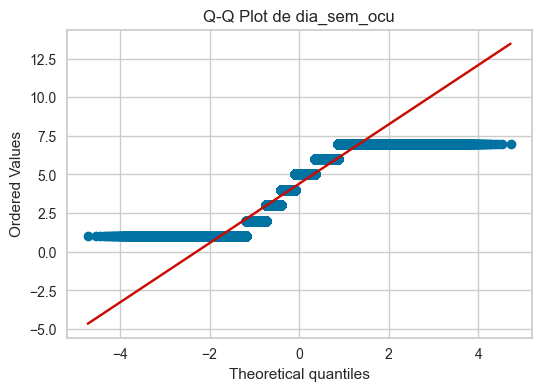

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 16788.0882
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: hora_ocu ---


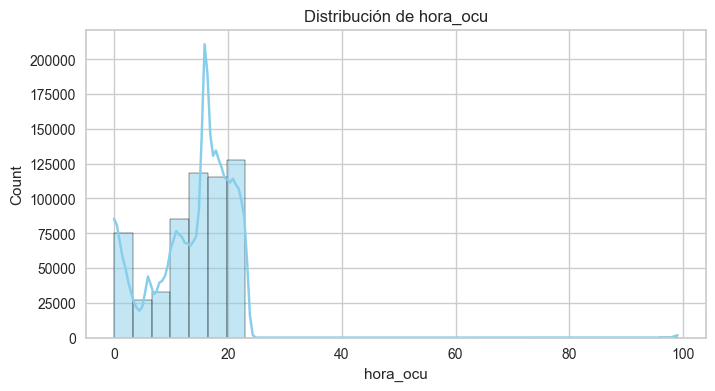

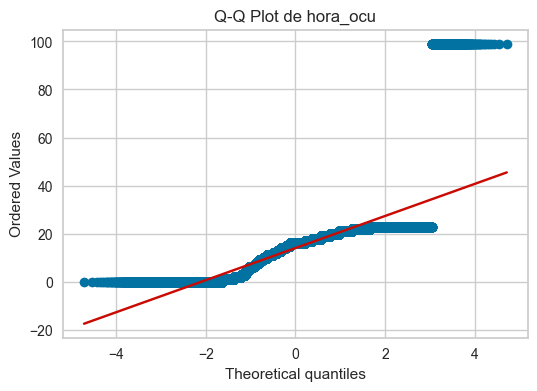

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 14393.6229
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: g_hora ---


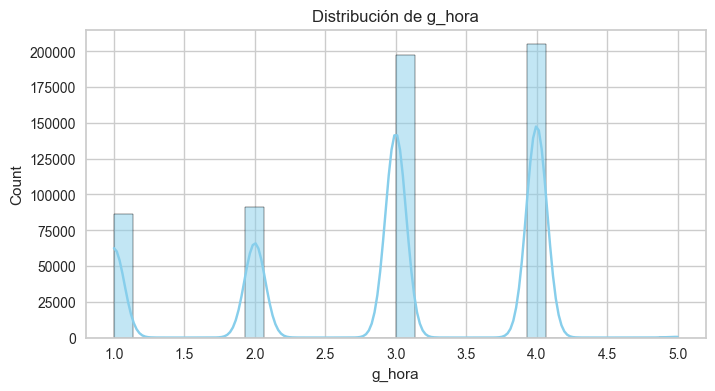

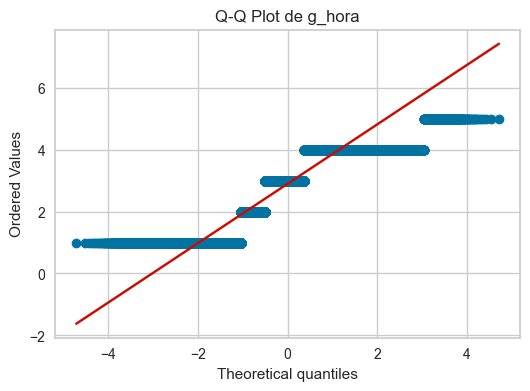

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 35964.3459
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: g_hora_periodo ---


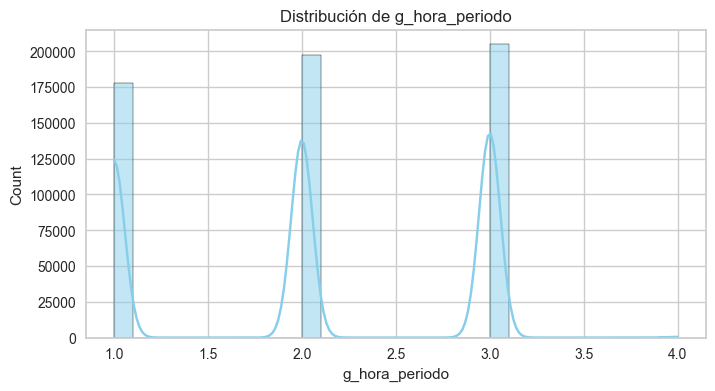

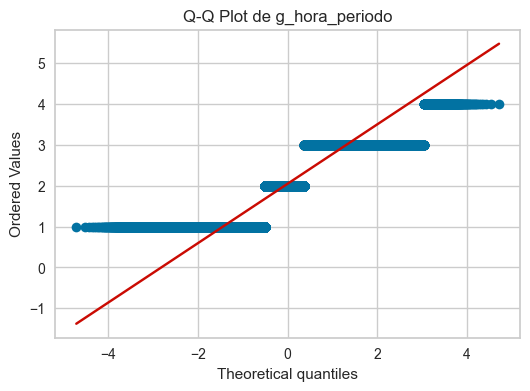

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 46983.9841
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: area_geo_ocu ---


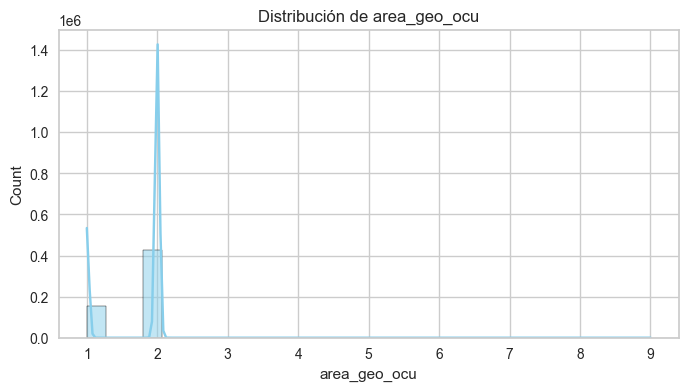

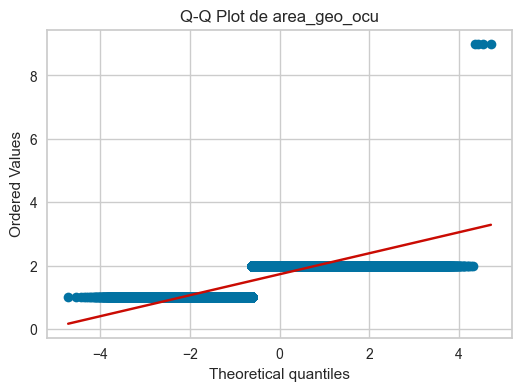

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 134063.0226
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: depto_ocu ---


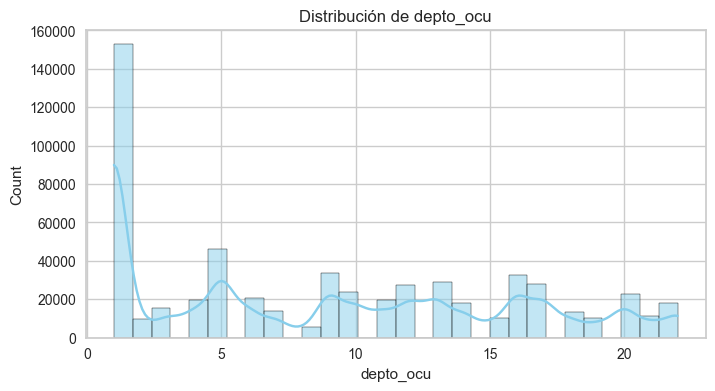

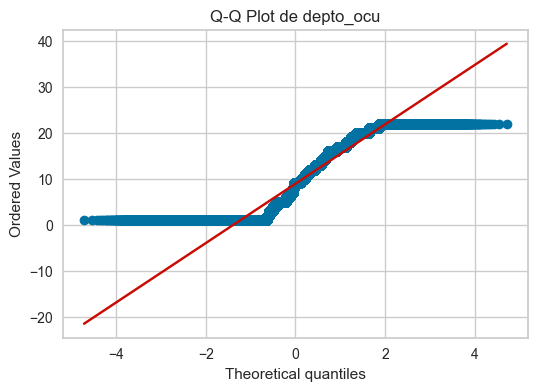

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 17615.8733
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: mupio_ocu ---


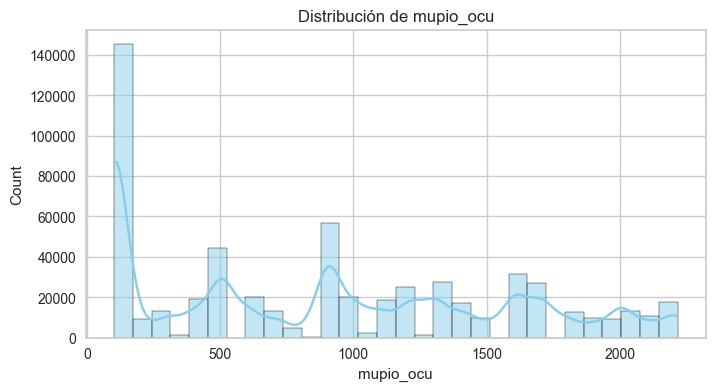

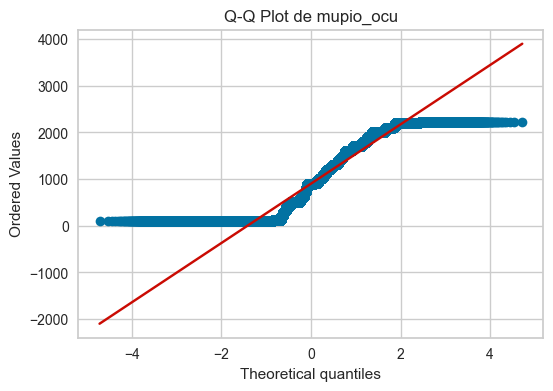

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 14724.4353
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: zona_ocu ---


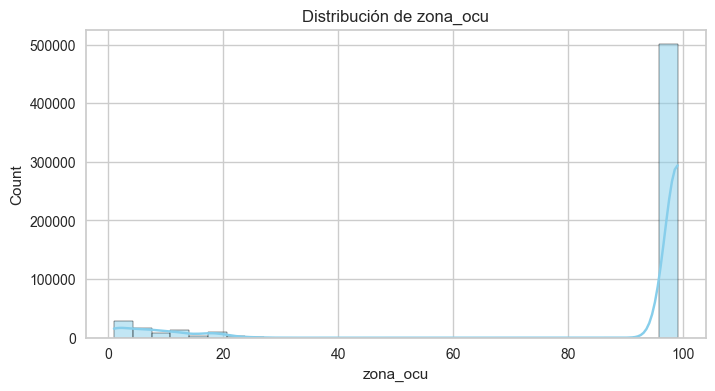

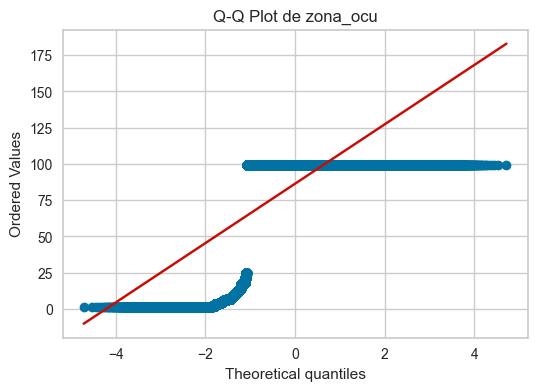

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 172810.7108
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: sexo ---


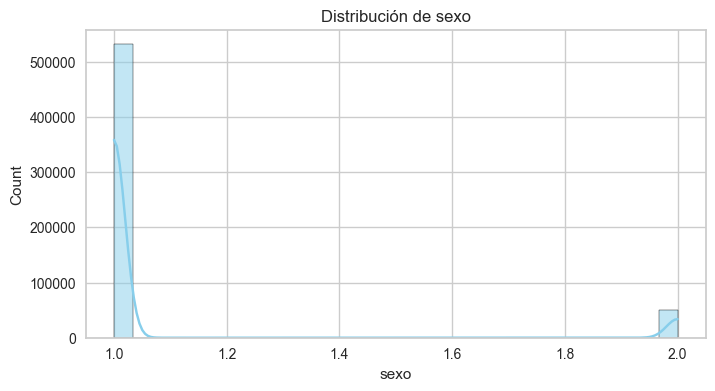

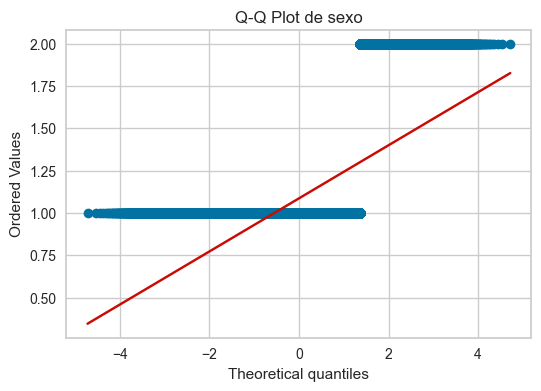

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 196852.8317
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: edad ---


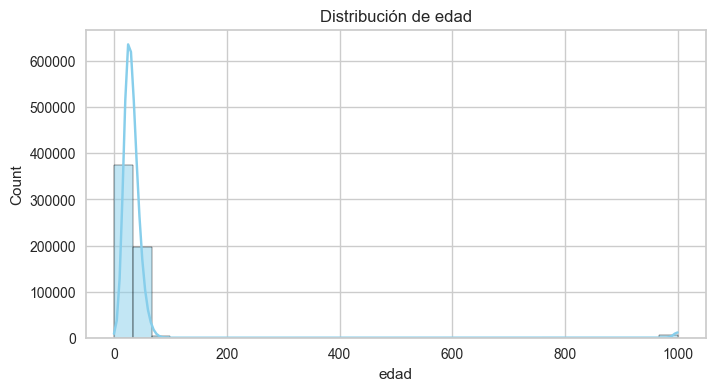

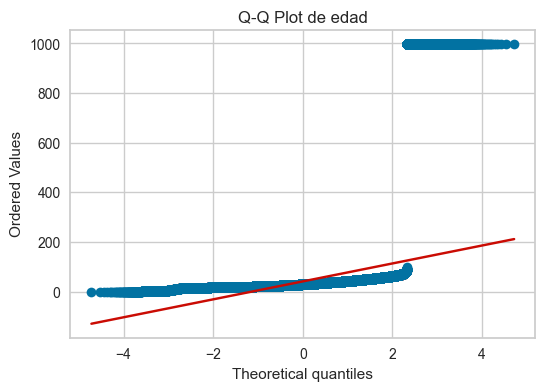

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 172021.0947
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: g_edad_60ymás ---


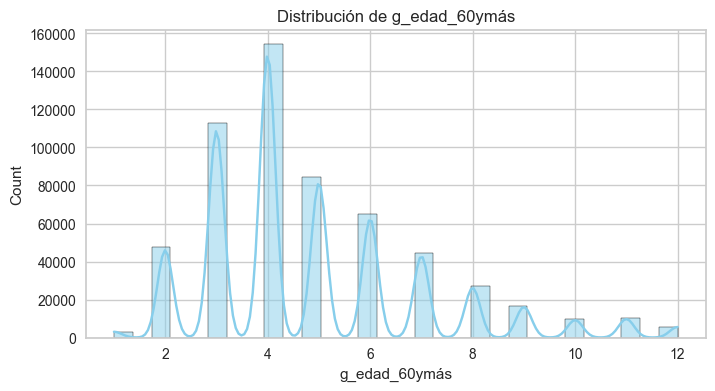

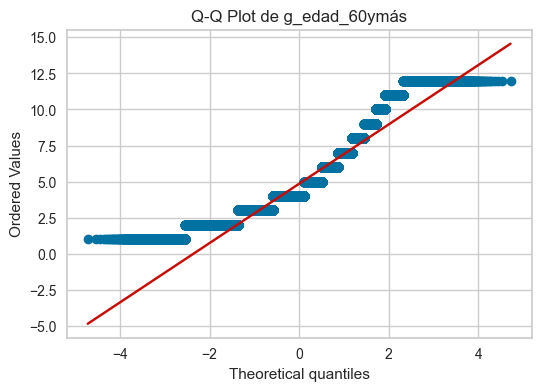

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 18274.2313
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: g_edad_80ymás ---


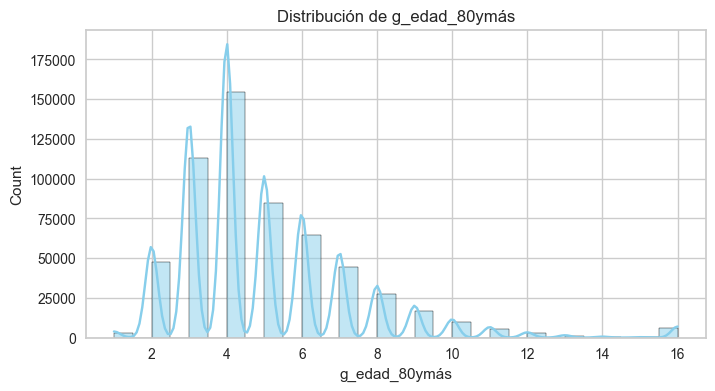

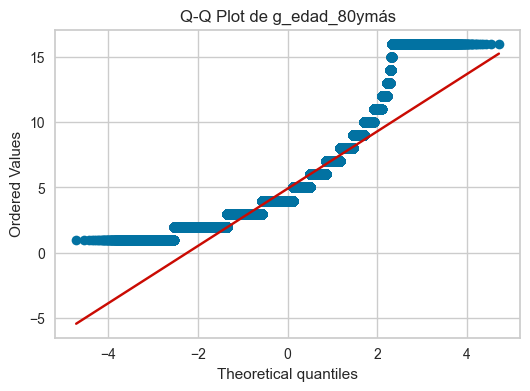

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 20614.2155
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: edad_quinquenales ---


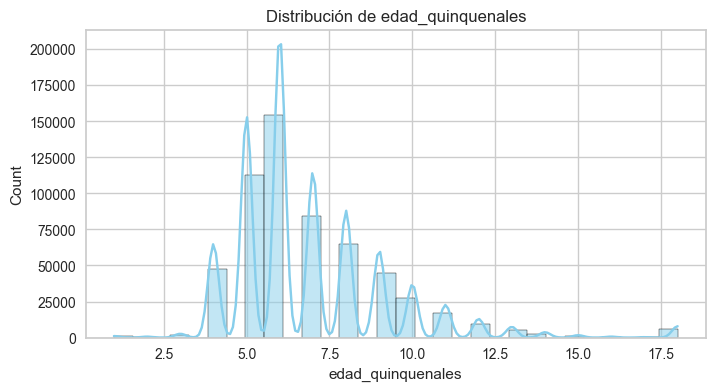

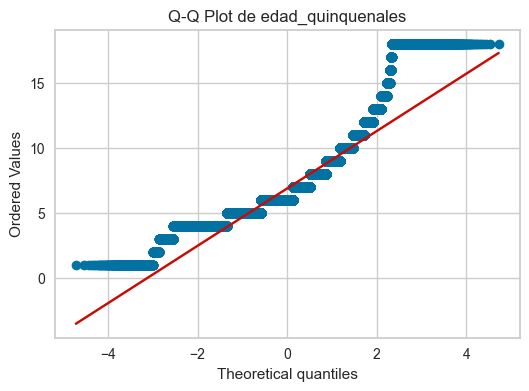

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 20484.1757
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: delito ---


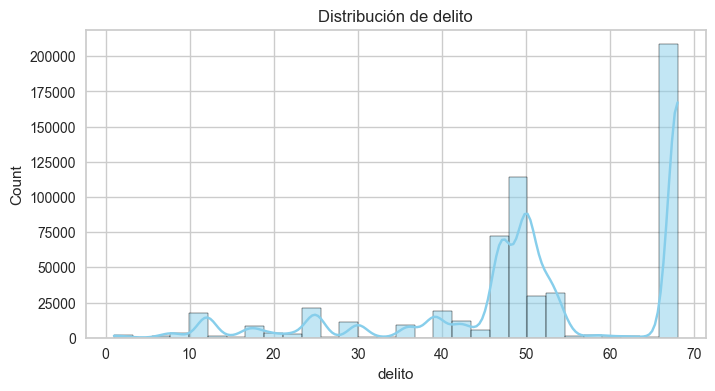

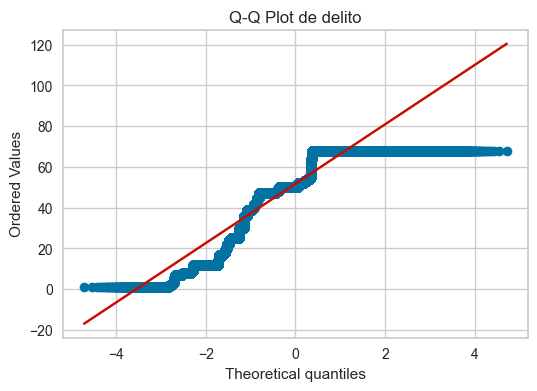

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 29102.3933
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: g_delitos ---


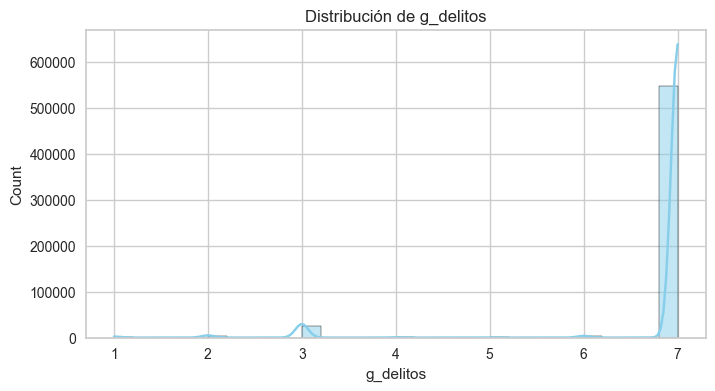

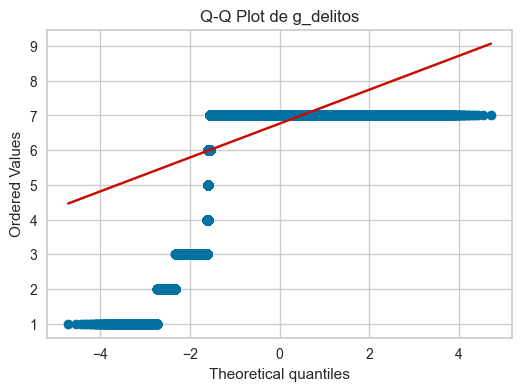

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 202904.5896
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: filter_$ ---


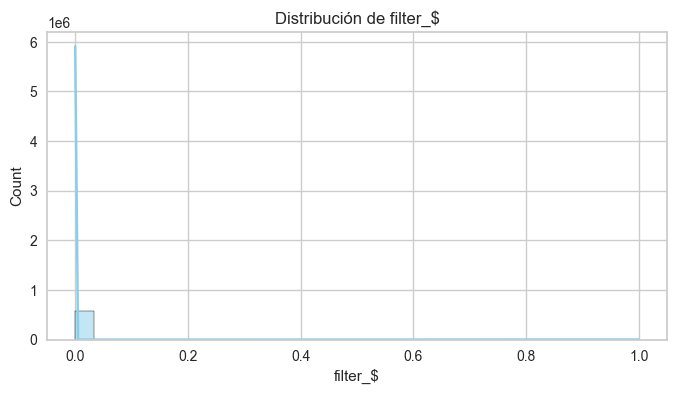

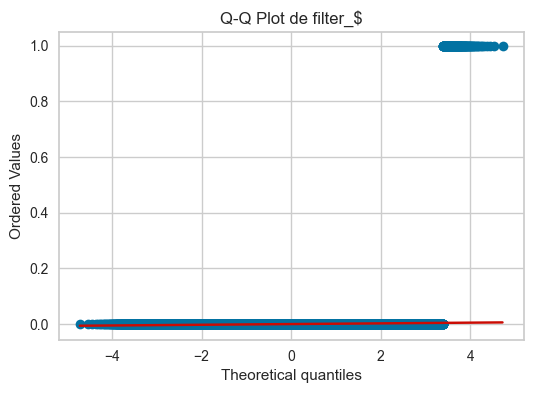

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 224511.3622
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: menor_mayor ---


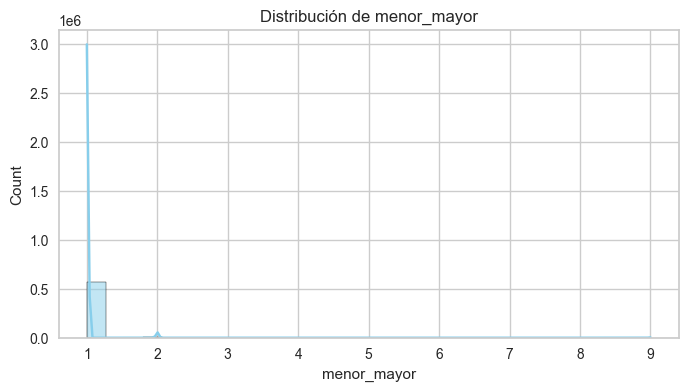

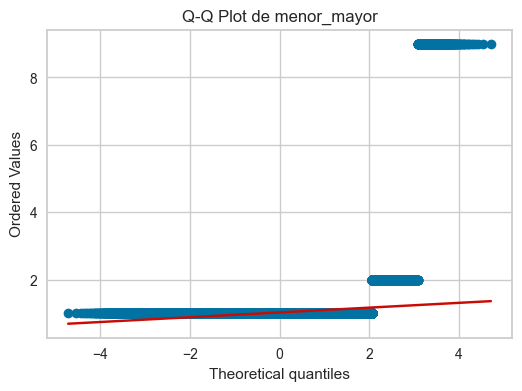

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 212416.7566
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: codigo_interno ---


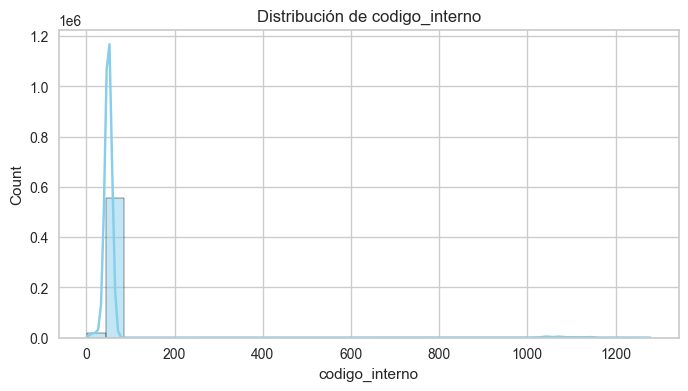

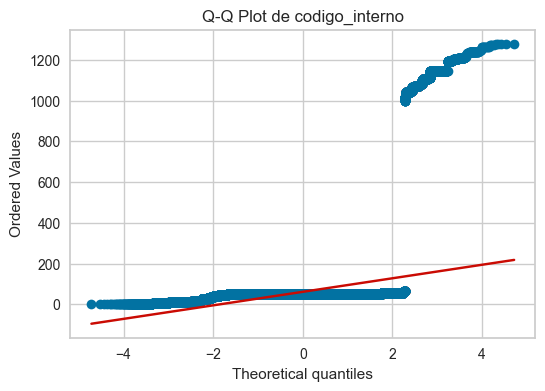

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 214805.5125
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

--- Análisis de la variable: causas ---


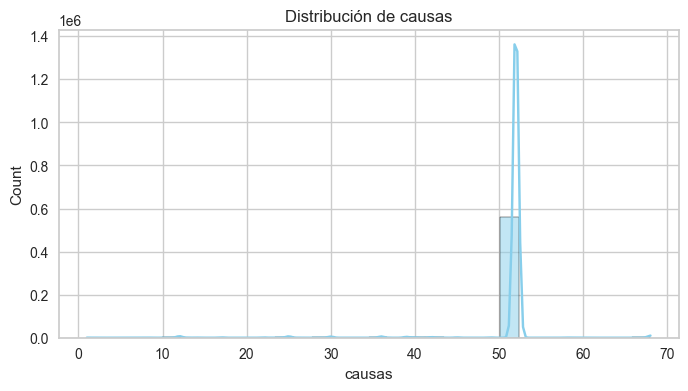

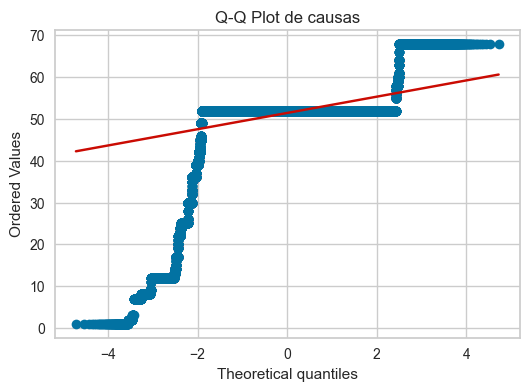

Kolmogorov-Smirnov p-valor: 0.0000 (p < 0.05 indica no normalidad)
D'Agostino-Pearson p-valor: 0.0000 (p < 0.05 indica no normalidad)
Anderson-Darling estadístico: 204596.8588
   Nivel de significancia: 15.0%, Valor crítico: 0.5760
   Nivel de significancia: 10.0%, Valor crítico: 0.6560
   Nivel de significancia: 5.0%, Valor crítico: 0.7870
   Nivel de significancia: 2.5%, Valor crítico: 0.9180
   Nivel de significancia: 1.0%, Valor crítico: 1.0920

Análisis de normalidad completado.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Evaluar normalidad en variables numéricas
def check_normality(datos):
    num_vars = datos.select_dtypes(include=[np.number]).columns

    for col in num_vars:
        print(f"\n--- Análisis de la variable: {col} ---")

        # Histograma y KDE
        plt.figure(figsize=(8, 4))
        sns.histplot(datos[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribución de {col}')
        plt.show()

        # Q-Q Plot
        plt.figure(figsize=(6, 4))
        stats.probplot(datos[col], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot de {col}')
        plt.show()

        # Pruebas estadísticas de normalidad
        stat, p_ks = stats.kstest(datos[col], 'norm', args=(datos[col].mean(), datos[col].std()))  # Kolmogorov-Smirnov
        stat, p_dagostino = stats.normaltest(datos[col])  # D'Agostino-Pearson
        anderson_result = stats.anderson(datos[col], dist='norm')  # Anderson-Darling

        print(f"Kolmogorov-Smirnov p-valor: {p_ks:.4f} (p < 0.05 indica no normalidad)")
        print(f"D'Agostino-Pearson p-valor: {p_dagostino:.4f} (p < 0.05 indica no normalidad)")
        print(f"Anderson-Darling estadístico: {anderson_result.statistic:.4f}")
        for i in range(len(anderson_result.critical_values)):
            sig_lvl = anderson_result.significance_level[i]
            crit_val = anderson_result.critical_values[i]
            print(f"   Nivel de significancia: {sig_lvl:.1f}%, Valor crítico: {crit_val:.4f}")

    print("\nAnálisis de normalidad completado.")

# Ejecutar el análisis de normalidad
check_normality(datos)

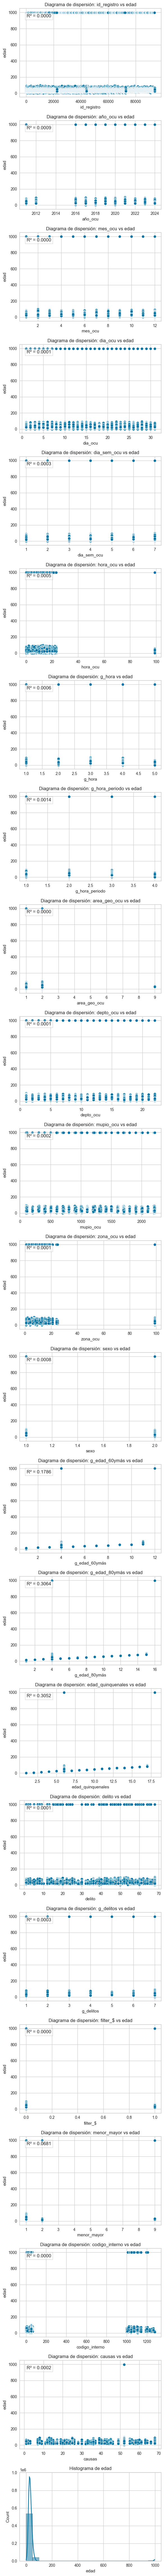

In [16]:
def plot_scatter_and_hist(df, x_columns, y_column):
    num_plots = len(x_columns)
    fig, axes = plt.subplots(num_plots + 1, 1, figsize=(6, 4 * (num_plots + 1)))

    if num_plots == 1:
        axes = [axes]  # Asegurar que axes es iterable

    # Generar diagramas de dispersión y calcular R²
    for i, x_col in enumerate(x_columns):
        sns.scatterplot(data=df, x=x_col, y=y_column, ax=axes[i])
        axes[i].set_title(f'Diagrama de dispersión: {x_col} vs {y_column}')

        # Calcular R²
        valid_data = df[[x_col, y_column]].dropna()
        if not valid_data.empty:
            slope, intercept, r_value, _, _ = linregress(valid_data[x_col], valid_data[y_column])
            r_squared = r_value ** 2
            axes[i].text(0.05, 0.9, f'R² = {r_squared:.4f}', transform=axes[i].transAxes, fontsize=12,
                         bbox=dict(facecolor='white', alpha=0.5))

    # Generar histograma de y_column
    sns.histplot(df[y_column], bins=20, kde=True, ax=axes[-1])
    axes[-1].set_title(f'Histograma de {y_column}')

    plt.tight_layout()
    plt.show()

# Ejemplo de uso: graficar dispersión con respecto a una variable objetivo
cand = datos.select_dtypes(include=[np.number]).columns.tolist()
cand.remove('edad')  # Suponiendo que "edad" es la variable objetivo
plot_scatter_and_hist(datos, cand, 'edad')